In [ ]:
# import the necessary packages
import numpy as np
import time
import cv2
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
import os
import urllib.request

# Define the URLs for weights and config file
weights_url = "https://pjreddie.com/media/files/yolov3.weights"
cfg_url = "https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true"

# Define paths where you want to save the files
weights_dir = "YOLO/yolo/"
cfg_dir = "YOLO/yolo/"
weights_path = os.path.join(weights_dir, "yolov3.weights")
cfg_path = os.path.join(cfg_dir, "yolov3.cfg")

# Function to download file from url
def download_file(url, file_path):
    print("Downloading", url)
    urllib.request.urlretrieve(url, file_path)
    print("Download completed.")

# Check if the directories exist, if not, create them
if not os.path.exists(weights_dir):
    os.makedirs(weights_dir)

if not os.path.exists(cfg_dir):
    os.makedirs(cfg_dir)

# Check if the files already exist, if not, download them
if not os.path.exists(weights_path):
    download_file(weights_url, weights_path)

if not os.path.exists(cfg_path):
    download_file(cfg_url, cfg_path)

print("YOLOv3 weights and config are ready at:", weights_path, "and", cfg_path)

Download completed.
Download completed.
YOLOv3 weights and config are ready at: YOLO/yolo/yolov3.weights and YOLO/yolo/yolov3.cfg


In [ ]:
import urllib.request

# URL of the coco.names file
coco_names_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Local path to save the file
coco_names_path = "coco.names"

# Download the file
urllib.request.urlretrieve(coco_names_url, coco_names_path)

print("coco.names downloaded successfully.")

coco.names downloaded successfully.


In [ ]:
# Load the COCO class labels our YOLO model was trained on
labelsPath = "/content/coco.names"
LABELS = open(labelsPath).read().strip().split("\n")

# We now need to initialize a list of colors to represent each possible class label
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

print("Loading YOLO weights...")

weights_path = "/content/YOLO/yolo/yolov3.weights"
cfg_path = "/content/YOLO/yolo/yolov3.cfg"

# Create our blob object
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)

# Set our backend

"""
The line net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV) sets the
 preferred backend for running deep neural networks in OpenCV.

 Let's break down what this means:

Backend: In the context of deep learning frameworks,
a backend refers to the engine or library that performs
the computations required for running neural networks.
Different backends may have different implementations and optimizations,
leading to variations in performance and compatibility.
cv2.dnn: This is the OpenCV module for deep neural networks.

OpenCV provides a unified interface for working with pre-trained
deep learning models.

DNN_BACKEND_OPENCV: This is a constant that specifies the
preferred backend to be used by OpenCV's deep neural network module.
DNN_BACKEND_OPENCV indicates that the OpenCV's backend should be used
for running neural networks.

By setting net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV),
you're instructing OpenCV to use its own backend for performing
computations related to deep learning tasks.

This is useful because OpenCV's backend often leverages optimizations
specific to the computer vision tasks, which can improve performance
and compatibility.
"""

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

print("Our YOLO Layers")
ln = net.getLayerNames()

# There are 254 Layers
print(len(ln), ln)

Loading YOLO weights...
Our YOLO Layers
254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36'

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
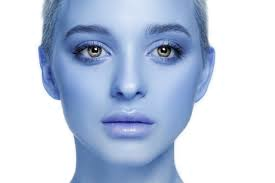

In [ ]:
cv2.imread("/content/YOLO/face.jpeg")

Starting Detections...
['face.jpeg', 'sherpal.jpg']
Image Path: /content/YOLO/face.jpeg
Image Dimensions (H, W): (183, 275)


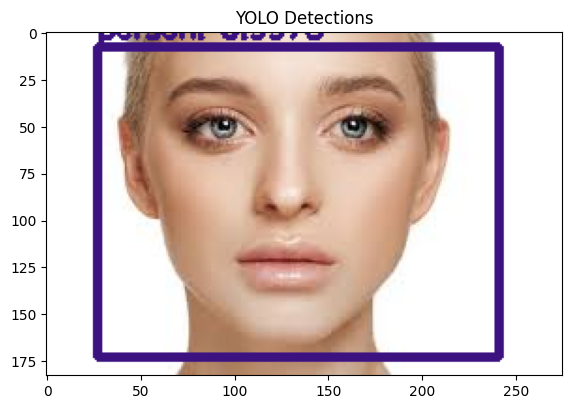

Image Path: /content/YOLO/sherpal.jpg
Image Dimensions (H, W): (300, 168)


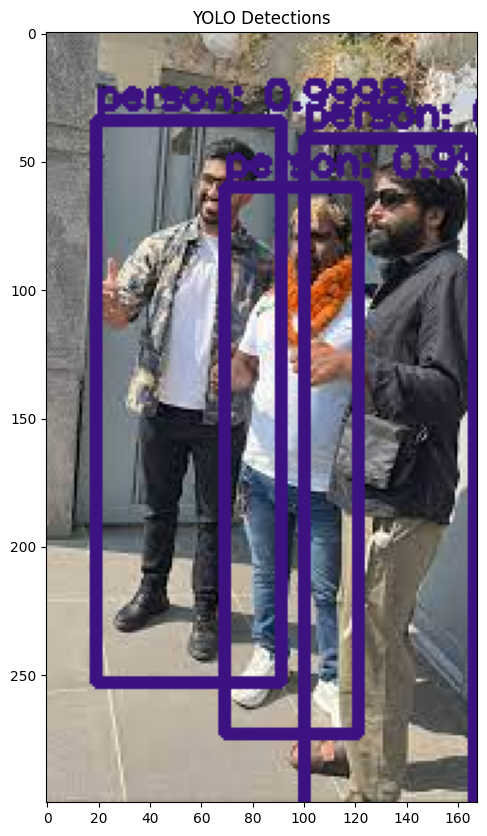

In [ ]:
import cv2
import numpy as np
import os

# Load COCO class labels
labelsPath = "coco.names"
LABELS = open(labelsPath).read().strip().split("\n")

# Load YOLO weights and config
weights_path = "YOLO/yolo/yolov3.weights"
cfg_path = "YOLO/yolo/yolov3.cfg"

net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load random colors for each class label
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

print("Starting Detections...")

# Directory containing the image
image_folder = "/content/YOLO"
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
print(image_files)

# Loop through images and run them through our classifier
for file in image_files:
    # Load input image
    image_path = os.path.join(image_folder, file)
    print("Image Path:", image_path)

    # Read the image
    image = cv2.imread(image_path)

    # Check if image is loaded properly
    if image is None:
        print("Error: Unable to load image:", image_path)
    else:
        # Get image dimensions
        (H, W) = image.shape[:2]
        print("Image Dimensions (H, W):", (H, W))

        # Obtain output layer names from YOLO
        ln = net.getLayerNames()
        ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

        # Create blob from input image
        blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        layerOutputs = net.forward(ln)

        # Initialize lists for bounding boxes, confidences, and class IDs
        boxes = []
        confidences = []
        IDs = []

        # Loop over each of the layer outputs
        for output in layerOutputs:
            # Loop over each detection
            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]

                if confidence > 0.75:
                    box = detection[0:4] * np.array([W, H, W, H])
                    (centerX, centerY, width, height) = box.astype("int")
                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))
                    boxes.append([x, y, int(width), int(height)])
                    confidences.append(float(confidence))
                    IDs.append(classID)

        # Apply non-maxima suppression to reduce overlapping bounding boxes
        idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

        if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                color = [int(c) for c in COLORS[IDs[i]]]
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
                text = "{}: {:.4f}".format(LABELS[IDs[i]], confidences[i])
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        imshow("YOLO Detections", image)